In [1]:
import sys
print ('Python: {}'.format(sys.version))

Python: 3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [2]:
import scipy
import numpy
import pandas
import sklearn
import matplotlib

In [9]:
from pandas.plotting import scatter_matrix
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

In [10]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'class']
dataset = read_csv(url, names=names)

In [11]:
print(dataset.shape)

(150, 4)


In [12]:
print(dataset.head(20))

     sepal-length  sepal-width  petal-length        class
5.1           3.5          1.4           0.2  Iris-setosa
4.9           3.0          1.4           0.2  Iris-setosa
4.7           3.2          1.3           0.2  Iris-setosa
4.6           3.1          1.5           0.2  Iris-setosa
5.0           3.6          1.4           0.2  Iris-setosa
5.4           3.9          1.7           0.4  Iris-setosa
4.6           3.4          1.4           0.3  Iris-setosa
5.0           3.4          1.5           0.2  Iris-setosa
4.4           2.9          1.4           0.2  Iris-setosa
4.9           3.1          1.5           0.1  Iris-setosa
5.4           3.7          1.5           0.2  Iris-setosa
4.8           3.4          1.6           0.2  Iris-setosa
4.8           3.0          1.4           0.1  Iris-setosa
4.3           3.0          1.1           0.1  Iris-setosa
5.8           4.0          1.2           0.2  Iris-setosa
5.7           4.4          1.5           0.4  Iris-setosa
5.4           

In [13]:
print(dataset.describe())

       sepal-length  sepal-width  petal-length
count    150.000000   150.000000    150.000000
mean       3.054000     3.758667      1.198667
std        0.433594     1.764420      0.763161
min        2.000000     1.000000      0.100000
25%        2.800000     1.600000      0.300000
50%        3.000000     4.350000      1.300000
75%        3.300000     5.100000      1.800000
max        4.400000     6.900000      2.500000


In [15]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
dtype: object

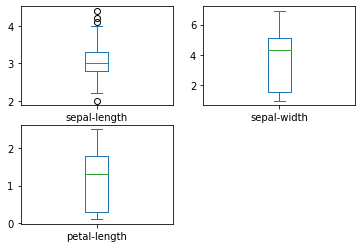

In [16]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

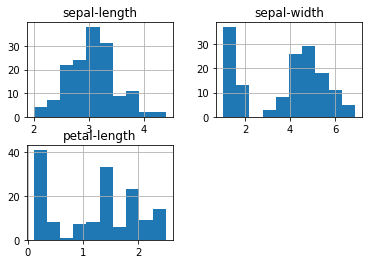

In [17]:
dataset.hist()
pyplot.show()

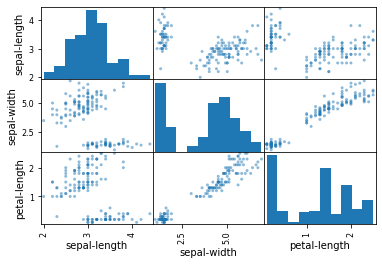

In [18]:
scatter_matrix(dataset)
pyplot.show()

In [35]:
array = dataset.values
X = array[:, 0:3]
Y = array[:, 3]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.2, random_state=1)

In [36]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [37]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.916667 (0.064550)
LDA: 0.966667 (0.055277)
KNN: 0.958333 (0.041667)
NB: 0.958333 (0.041667)
SVM: 0.975000 (0.038188)


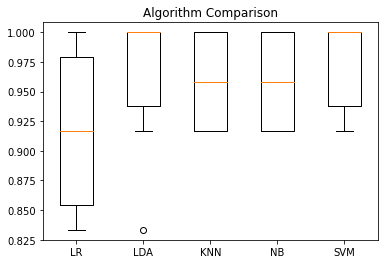

In [38]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [40]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [41]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

